# Assignement 3

## Imports and installs

In [6]:
%pip install numpy pandas sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

In [7]:
import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import preprocessing
import matplotlib.pyplot as plt 

## Task 0

In [8]:
data = pd.read_csv("./data/iris_clusters.csv", delimiter=";")
data

,pl,pw,sl,sw,id
0,6.7,3.0,4.6,1.5,87.0
1,6.7,2.8,4.6,1.2,209.0
2,5.0,3.6,1.6,0.5,344.0
3,6.3,3.1,5.9,2.5,401.0
4,7.0,2.9,5.7,1.7,430.0
...,...,...,...,...,...
295,6.8,3.0,5.0,2.5,14842.0
296,5.7,2.6,4.9,1.9,14843.0
297,5.6,3.4,1.2,0.2,14887.0
298,5.4,2.6,4.3,1.2,14941.0


## Task 1 K-means

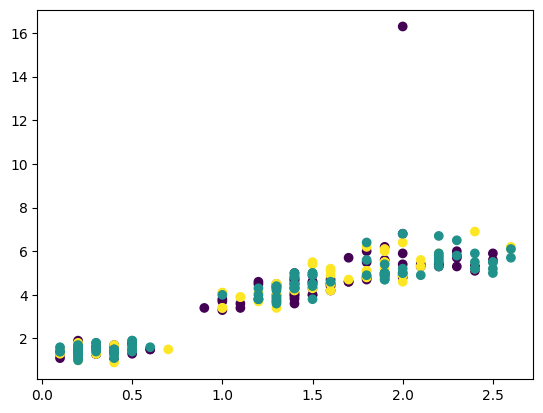

In [9]:
kmeans = cluster.KMeans(n_clusters=3)
kmeans.fit(data)

plt.scatter(data["sw"], data["sl"], c=kmeans.labels_, cmap='viridis') 
plt.show()

They don't coincide with the previously mentioned groups

## TASK 2: preprocessing

array([[7.66212329e-02, 3.43080147e-02, 5.26056226e-02, 1.71540074e-02,
        9.94932428e-01],
       [3.20298097e-02, 1.33855921e-02, 2.19906156e-02, 5.73668233e-03,
        9.99138839e-01],
       [1.45323805e-02, 1.04633140e-02, 4.65036177e-03, 1.45323805e-03,
        9.99827781e-01],
       ...,
       [3.76167088e-04, 2.28387161e-04, 8.06072331e-05, 1.34345389e-05,
        9.99999900e-01],
       [3.61421546e-04, 1.74017782e-04, 2.87798639e-04, 8.03158992e-05,
        9.99999875e-01],
       [3.81270853e-04, 1.80601983e-04, 2.80936418e-04, 8.69565102e-05,
        9.99999868e-01]])

array([[1.04339357e-02, 6.73858350e-03, 2.82585760e-03, 2.17373661e-04,
        9.99918843e-01],
       [1.10061139e-02, 6.34250631e-03, 8.58103795e-03, 3.17125316e-03,
        9.99877466e-01],
       [1.07516478e-02, 4.76144403e-03, 7.06536857e-03, 2.30392453e-03,
        9.99903247e-01],
       ...,
       [3.76167088e-04, 2.28387161e-04, 8.06072331e-05, 1.34345389e-05,
        9.99999900e-01],
       [3.61421546e-04, 1.74017782e-04, 2.87798639e-04, 8.03158992e-05,
        9.99999875e-01],
       [3.81270853e-04, 1.80601983e-04, 2.80936418e-04, 8.69565102e-05,
        9.99999868e-01]])

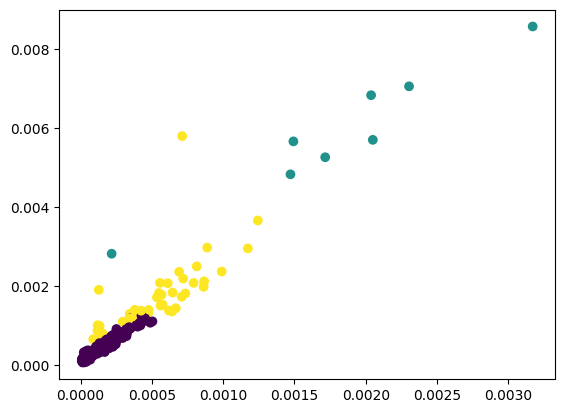

In [10]:
ndata = preprocessing.normalize(data)

from scipy import stats

z_scores = np.abs(stats.zscore(ndata))
outliers_mask = (z_scores < 3).all(axis=1)
data_clean = ndata[outliers_mask]
display(ndata)
display(data_clean)

kmeans = cluster.KMeans(n_clusters=3)
kmeans.fit(data_clean)

plt.scatter(data_clean[:, 3], data_clean[:, 2], c=kmeans.labels_, cmap='viridis') 
plt.show()  